In [1]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'

dict = {}
for lc in range(1728):
    lc00 = f'{lc:04d}'

    filename = f'{data_dir}/lc{lc00}/h0_mcmc_scatter.csv'

    # check if file exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)

        # save to df
        if 'delta' not in list(dict.keys()):  # dict.keys() is of type dict_keys
            for key in df.keys():           # load all data
                dict[key] = df[key]

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.full(length, lc)
        else:
            for key in df.keys():           # load all data
                dict[key] = np.concatenate((dict[key], df[key]))

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.concatenate((dict['Lightcone'], np.full(length, lc)))

    else:
        print(lc00, 'h0_mcmc_scatter.csv not found.')
        continue
    
data = pd.DataFrame(dict)

data

1215 h0_mcmc_scatter.csv not found.


,scaling_relation,delta,delta_err_lower,delta_err_upper,vlon,vlon_err_lower,vlon_err_upper,vlat,vlat_err_lower,vlat_err_upper,convergence_time,Lightcone
0,LX-T,0.044489,0.029309,0.032752,-48.021817,38.028336,42.020201,-8.287346,29.513930,29.140801,86.123327,0
1,YSZ-T,0.022074,0.014781,0.019891,-119.937162,147.365447,61.635264,-35.817501,34.789693,42.111579,94.384478,0
2,LX-T,0.028688,0.019354,0.022638,-12.002991,97.655484,83.190884,42.861932,40.621710,31.590582,84.194876,1
3,YSZ-T,0.020565,0.014369,0.020016,-83.968204,81.233740,85.662503,-29.764978,39.517611,46.645611,100.796751,1
4,LX-T,0.021192,0.014550,0.022147,71.980186,98.737039,109.869115,33.498121,55.714631,38.514467,100.586012,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3449,YSZ-T,0.019327,0.013215,0.017632,-47.929301,92.299951,112.612525,-41.522852,33.612215,49.396216,88.373646,1725
3450,LX-T,0.034821,0.021092,0.021755,-143.983871,110.033665,106.870531,58.231853,36.281340,21.953496,99.390808,1726
3451,YSZ-T,0.016837,0.011791,0.017384,-119.927759,128.428714,89.106964,28.759483,58.795561,40.615018,91.730575,1726
3452,LX-T,0.029272,0.020137,0.028460,-107.922366,128.812067,50.875875,23.197544,42.424733,38.152619,99.638867,1727


In [2]:
# Get the significance
significance = data['delta'] / data['delta_err_lower']
data['Significance'] = significance
data['DeltaH0'] = data['delta'] * 2 * 100 # to percentage

In [3]:
data.to_csv('../data/analysis_all/h0_mc_scatter.csv')

## Plot

In [14]:
import pandas as pd
data = pd.read_csv('../data/analysis_all/h0_mc_scatter.csv')

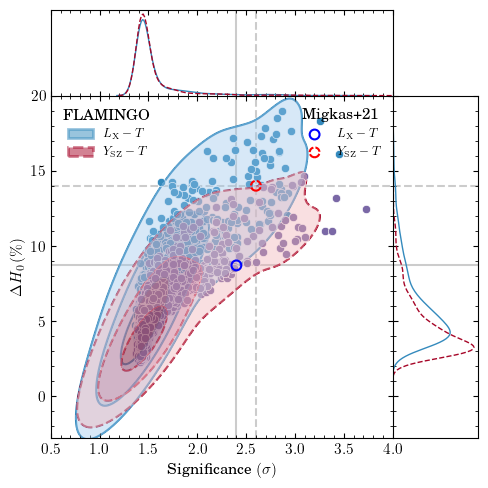

In [ ]:
# ---------------------------------------------------------------------------- #
#                                Plot for print                                #
# ---------------------------------------------------------------------------- #
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('./nice.mplstyle')

# Set colors and linestyles
colors = ['#348ABD', '#A60628']
linestyles = ['solid', '--']  # solid, densely dashed, densely dashdotdotted https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
bandwidth = 2.6

# Create the 2D KDE plot
g = sns.JointGrid(data=data, 
                    x='Significance',
                    y='DeltaH0', 
                    hue='scaling_relation',
                    space=0,
                    ratio=4,
                    height=5,
                    xlim=(0.5, 4.0),
                    ylim=(-2.8, 20),
                    )

# kde plot missing 3rd level contour if use g.plot_joint, for unknown reason
for relation, color, linestyle in zip(['LX-T', 'YSZ-T'], 
                            colors, linestyles):

    # Line contours
    sns.kdeplot(data=data[data['scaling_relation'] == relation], 
                x='Significance',
                y='DeltaH0', 
                color=color,
                fill=False, 
                levels=(0.011, 0.14, 0.61, 1.),
                bw_adjust=bandwidth, # 3.2,
                zorder=1,
                linestyles=linestyle,
                linewidths=1.5,
                ax=g.ax_joint
                )
    
    # sns.scatterplot(data=data[data['scaling_relation'] == relation], 
    #             x='Significance',
    #             y='DeltaH0',
    #             ax=g.ax_joint
    # )

    # Filled contours
    sns.kdeplot(data=data[data['scaling_relation'] == relation], 
                x='Significance',
                y='DeltaH0', 
                color=color,
                fill=True, 
                levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
                bw_adjust=bandwidth, # 3.2,
                zorder=2,
                alpha=0.4,
                ax=g.ax_joint,
                )

    # Marginal histograms
    sns.kdeplot(data=data[data['scaling_relation'] == relation], 
                x='Significance',
                fill=False,
                color=color,
                linestyle=linestyle,
                ax=g.ax_marg_x
    )
   
    sns.kdeplot(data=data[data['scaling_relation'] == relation], 
                y='DeltaH0',
                fill=False,
                color=color,
                linestyle=linestyle,
                ax=g.ax_marg_y,
    )

# M21 results: Lx-T
x_point = 2.4
y_point = 8.7
g.refline(x=x_point, y=y_point, linestyle=linestyles[0], color='grey', linewidth=1.5, alpha=0.4, zorder=0)
line0 = g.ax_joint.scatter(x_point, y_point, marker='o', s=50, 
    linewidths=1.5, facecolor='none', edgecolors='b', linestyle=linestyles[0],
    label='$L_\\mathrm{{X}}-T$', zorder=10)
#g.ax_joint.axhspan(ymin=8.7-3.1, ymax=8.7+3.1, color='tab:blue', alpha=0.2, zorder=0)

# M21 results: Ysz-T
x_point = 2.6
y_point = 14
g.refline(x=x_point, y=y_point, linestyle=linestyles[1], color='grey', linewidth=1.5, alpha=0.4, zorder=0)
line1 = g.ax_joint.scatter(x_point, y_point, marker='o', s=50, 
    linewidths=1.5, facecolor='none', edgecolors='r', linestyle=(0, (3, 1)),
    label='$Y_\\mathrm{{SZ}}-T$', zorder=10)
#g.ax_joint.axhspan(ymin=14.0-3.4, ymax=14.0+3.4, color='tab:orange', alpha=0.2, zorder=0)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# # matplotlib doesn't detect the contour correctly, adding it manually
# import matplotlib.patches as mpatches
# contour = mpatches.Patch(color='tab:blue', label='$Y_\\mathrm{{SZ}}-T$')
g.ax_marg_x.legend(handles=[line0, line1], title='Migkas+21', loc='upper right', bbox_to_anchor=(1,0), fontsize=9) # put right corner at 1,0

#sns.move_legend(g.ax_joint, loc='upper right', bbox_to_anchor=(1.7, 0.75), title='FLAMINGO')
from matplotlib.patches import Patch
# Create custom legend for contours
contour_legend_elements = [Patch(facecolor=colors[0], edgecolor=colors[0], linestyle=linestyles[0], linewidth=2, label='$L_\\mathrm{X}-T$', alpha=0.5),
                           Patch(facecolor=colors[1], edgecolor=colors[1], linestyle=linestyles[1], linewidth=2, label='$Y_\\mathrm{SZ}-T$', alpha=0.5)]

# Add the custom legend for contours
g.ax_joint.legend(handles=contour_legend_elements, title='FLAMINGO', loc='upper left', fontsize=9)

g.set_axis_labels('Significance $(\\sigma)$', '$\\Delta H_0\\,(\\%)$')
# plt.savefig('./to_paper/h0mc_hist_LTYTMT_scatter.pdf', bbox_inches='tight')
# Show the plot
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
import numpy as np

def cross_validated_bandwidth(kde_obj):
    """Return optimal bandwidth using sklearn's GridSearchCV."""
    # Data shape: (d, N), so transpose for sklearn
    data = kde_obj.dataset.T  # shape (N, d)
    
    params = {'bandwidth': np.linspace(0.1, 5.0, 30)}
    grid = GridSearchCV(KernelDensity(kernel='gaussian'), params, cv=5)
    grid.fit(data)
    
    best_bw = grid.best_params_['bandwidth']
    print(f"[CV bandwidth] Best bandwidth: {best_bw}")
    
    # Return as a factor relative to kde_obj.scotts_factor()
    # So that kde.factor * scotts_factor = best_bw
    return best_bw / kde_obj.scotts_factor()


## KDE estimation

In [3]:
!ls /cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/

bf_mc_all.csv			  h0_mc_all.csv
bf_mc_all_scatter.csv		  h0_mc_all_full.csv
bf_mc_zcos.csv			  h0_mc_joint_all.csv
bf_truth.csv			  h0_mc_joint_scatter_all.csv
concatenated_fit_all.csv	  h0_mc_scatter.csv
concatenated_fit_all_mc.csv	  h0_mc_zcos.csv
concatenated_fit_all_scatter.csv  scatter_LX-T_added_scatter.csv
h0_angle_constraint_mc.csv	  scatter_LX-T.csv
h0_angle_constraint_scan.csv	  scatter_M-T.csv
h0_angle_constraints.csv	  scatter_YSZ-T_added_scatter.csv
h0_direct_compare.csv		  scatter_YSZ-T.csv
h0_direct_compare_scatter.csv


In [1]:
# Read data
import pandas as pd
data = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_mc_scatter.csv')

In [7]:
data

,Unnamed: 0,scaling_relation,delta,delta_err_lower,delta_err_upper,vlon,vlon_err_lower,vlon_err_upper,vlat,vlat_err_lower,vlat_err_upper,convergence_time,Lightcone,Significance,DeltaH0
0,0,LX-T,0.044489,0.029309,0.032752,-48.021817,38.028336,42.020201,-8.287346,29.513930,29.140801,86.123327,0,1.517910,8.897703
1,1,YSZ-T,0.022074,0.014781,0.019891,-119.937162,147.365447,61.635264,-35.817501,34.789693,42.111579,94.384478,0,1.493435,4.414759
2,2,LX-T,0.028688,0.019354,0.022638,-12.002991,97.655484,83.190884,42.861932,40.621710,31.590582,84.194876,1,1.482282,5.737694
3,3,YSZ-T,0.020565,0.014369,0.020016,-83.968204,81.233740,85.662503,-29.764978,39.517611,46.645611,100.796751,1,1.431246,4.112979
4,4,LX-T,0.021192,0.014550,0.022147,71.980186,98.737039,109.869115,33.498121,55.714631,38.514467,100.586012,2,1.456465,4.238369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,3449,YSZ-T,0.019327,0.013215,0.017632,-47.929301,92.299951,112.612525,-41.522852,33.612215,49.396216,88.373646,1725,1.462538,3.865425
3450,3450,LX-T,0.034821,0.021092,0.021755,-143.983871,110.033665,106.870531,58.231853,36.281340,21.953496,99.390808,1726,1.650886,6.964223
3451,3451,YSZ-T,0.016837,0.011791,0.017384,-119.927759,128.428714,89.106964,28.759483,58.795561,40.615018,91.730575,1726,1.427909,3.367318
3452,3452,LX-T,0.029272,0.020137,0.028460,-107.922366,128.812067,50.875875,23.197544,42.424733,38.152619,99.638867,1727,1.453593,5.854331


In [12]:
# Lx-T
dataset = data[data['scaling_relation']=='LX-T'][['DeltaH0', 'Significance']]

import numpy as np
import scipy.stats as stats
# gaussian KDE at the point of interest
print(dataset.T.values.shape)
kde = stats.gaussian_kde(dataset.T.values)

x_grid = np.linspace(-15, 40, 500) # delta H0
y_grid = np.linspace(-5, 20, 500)  # significance
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
print(Z.shape)
# print(Z)

# find probability mass above the point of interest
point = np.array([8.7, 2.4])
prob = kde(point) * (x_grid[1]-x_grid[0]) * (y_grid[1]-y_grid[0])
prob_mass = Z * (x_grid[1]-x_grid[0]) * (y_grid[1]-y_grid[0]) # probability mass in each bin
prob_above = np.sum(prob_mass[prob_mass > prob])
prob_below = np.sum(prob_mass[prob_mass < prob])

print(np.sum(prob_mass))
print(prob_above, prob_below)
print('p-value =', 1 - prob_above)

(2, 1727)
(500, 500)
0.99999999999999
0.9999045180223907 9.548197759927869e-05
p-value = 9.548197760933519e-05


In [ ]:
# Ysz-T
dataset = data[data['scaling_relation']=='YSZ-T'][['DeltaH0', 'Significance']]

import numpy as np
import scipy.stats as stats
# gaussian KDE at the point of interest
print(dataset.T.values.shape)
kde = stats.gaussian_kde(dataset.T.values, bw_method='silverman')

x_grid = np.linspace(-20, 40, 500) # delta H0
y_grid = np.linspace(-10, 20, 500)  # significance
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
print(Z.shape)
# print(Z)

# find probability mass above the point of interest
point = np.array([14, 2.6])
prob = kde(point)*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0])
prob_mass = Z*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0]) # probability mass in each bin
prob_above = np.sum(prob_mass[prob_mass > prob])
prob_below = np.sum(prob_mass[prob_mass < prob])

print(np.sum(prob_mass))
print(prob_above, prob_below)
print('p-value =',1 - prob_above)

(2, 1727)
(500, 500)
1.0000000000000229
0.9985662228526055 0.0014337771474173034
p-value = 0.001433777147394455
